<a href="https://colab.research.google.com/github/dhsingh0815/ML/blob/main/Bayes/SpamIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

nltk.download('stopwords')

df=pd.read_csv('/content/spam_2.csv')
df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
import string
df['v2']=df['v2'].map(lambda sentence: sentence.lower().translate(str.maketrans('', '', string.punctuation)))
df.head(5)

,v1,v2
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [52]:
stop_words=nltk.corpus.stopwords.words('english')

#[ var for var in iterable if condition: statement]
def prepocessing(sentence):
  words=sentence.split()
  filtered_tokens=[word for word in words if word not in stop_words]
  return ' '.join(filtered_tokens)

In [53]:
df['Filtered_tokens']=df['v2'].map(prepocessing)
df.head(5)

,v1,v2,Filtered_tokens
0,ham,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though


In [54]:
label ={'ham' :0 , 'spam':1}
df['label_encode']=df['v1'].map(label)
df.head(5)


,v1,v2,Filtered_tokens,label_encode
0,ham,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joking wif u oni,ok lar joking wif u oni,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,u dun say so early hor u c already then say,u dun say early hor u c already say,0
4,ham,nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though,0


In [55]:
df['label_encode'].value_counts()

,count
label_encode,
0,4825
1,747


We have imbalanced data , how to solve it as it is not numeric column

In [56]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

In [57]:
df_selected=df[['Filtered_tokens','label_encode']]
df_selected.head(5)

,Filtered_tokens,label_encode
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry 2 wkly comp win fa cup final tkts 2...,1
3,u dun say early hor u c already say,0
4,nah dont think goes usf lives around though,0


In [58]:
X=df_selected['Filtered_tokens']
y =df_selected['label_encode']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [59]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='minority')
# X_smote,y_smote=smote.fit_resample(X,y)

In [60]:
print(type(X_test))

<class 'pandas.core.series.Series'>


In [61]:
vectorizer = TfidfVectorizer()
X_train_pre= vectorizer.fit_transform(X_train)
X_test_pre=vectorizer.transform(X_test)

multinomialNB=MultinomialNB()
multinomialNB.fit(X_train_pre, y_train)

y_pred = multinomialNB.predict(X_test_pre)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

0.9614349775784753
[[957   0]
 [ 43 115]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       957
           1       1.00      0.73      0.84       158

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



Text(50.722222222222214, 0.5, 'Truth')

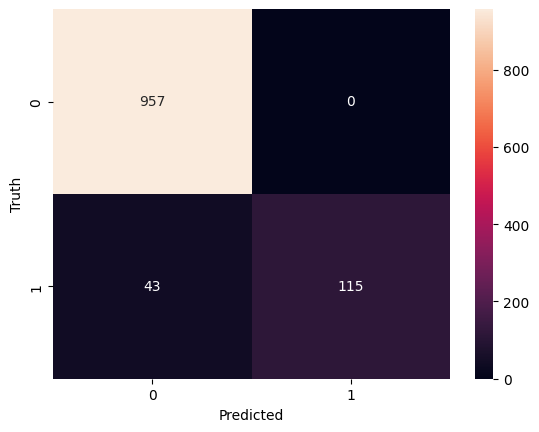

In [62]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
print(multinomialNB.predict(vectorizer.transform(pd.Series("""Are you unique enough? Find out from 30th August. www.areyouunique.co.uk"""))))

print(multinomialNB.predict(vectorizer.transform(pd.Series("""Dear User,
All Hotmail customers have been upgraded to Outlook.com. Your Hotmail Account services has expired.
Due to our new system upgrade to Outlook. In order for it to remain active follow the link Sign in Re-activate your account to Outlook. https://account.live.com
Thanks,
The Microsoft account team"""))))
print(multinomialNB.predict(vectorizer.transform(pd.Series("""
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!"""))))

[0]
[0]
[1]
